In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import Analyzer

In [29]:
mk = Analyzer.MarketDB()
stocks = ['삼성전자', 'SK하이닉스', '현대자동차', 'NAVER']
df = pd.DataFrame()
for s in stocks:
    df[s] = mk.get_daily_price(s, '2016-01-04', '2018-04-27')['close']

In [30]:
df# get_daily_price() 함수를 이용해 가져온 데이터프레임을 확인하면

,삼성전자,SK하이닉스,현대자동차,NAVER
date,,,,
2016-01-04,1205000,30150,144000,632000
2016-01-05,1208000,30600,143500,637000
2016-01-06,1175000,30750,140000,623000
2016-01-07,1163000,30200,137500,652000
2016-01-08,1171000,29700,136500,652000
...,...,...,...,...
2018-04-23,2595000,84400,159500,735000
2018-04-24,2523000,82100,162500,725000
2018-04-25,2520000,82400,164000,743000


In [31]:
daily_ret = df.pct_change() 
annual_ret = daily_ret.mean() * 252
daily_cov = daily_ret.cov() 
annual_cov = daily_cov * 252

port_ret = [] 
port_risk = [] 
port_weights = [] 

In [32]:
# 시총 상위 4 종목의 수일률을 비교하려면 종가 대신 일간 변동률로
# 비교를 해야 하기 때문에 fct_change() 함수를 사용해 4 종목의 
# 일간 변동률을 구한다.
daily_ret 

,삼성전자,SK하이닉스,현대자동차,NAVER
date,,,,
2016-01-04,NaN,NaN,NaN,NaN
2016-01-05,0.002490,0.014925,-0.003472,0.007911
2016-01-06,-0.027318,0.004902,-0.024390,-0.021978
2016-01-07,-0.010213,-0.017886,-0.017857,0.046549
2016-01-08,0.006879,-0.016556,-0.007273,0.000000
...,...,...,...,...
2018-04-23,0.005424,0.000000,-0.003125,0.009615
2018-04-24,-0.027746,-0.027251,0.018809,-0.013605
2018-04-25,-0.001189,0.003654,0.009231,0.024828


In [33]:
# 일간 변동률의 평균값에 252를 곱해서 연간 수익률을 구한다. 
# 252는 미국의 1년 평균 개장일로, 우리나라 실정에 맞게 다른 숫자로 바꾸어도 
# 무방하다.
# 연간 수익률 annual_ret값을 출력

annual_ret

삼성전자      0.383296
SK하이닉스    0.528546
현대자동차     0.079697
NAVER     0.099470
dtype: float64

In [34]:
# 일간 리스크는 cov() 함수를 사용해 일간 변동률의 공분산을 구한다. 
# daily_cov()

daily_cov

,삼성전자,SK하이닉스,현대자동차,NAVER
삼성전자,0.000270,0.000166,-0.000009,0.000060
SK하이닉스,0.000166,0.000463,0.000018,0.000050
현대자동차,-0.000009,0.000018,0.000308,0.000043
NAVER,0.000060,0.000050,0.000043,0.000353


In [35]:
# 연간 공분산은 일간 공분산에 252를 곱해 계산한다.

annual_cov

,삼성전자,SK하이닉스,현대자동차,NAVER
삼성전자,0.067946,0.041724,-0.002342,0.015076
SK하이닉스,0.041724,0.116797,0.004459,0.012703
현대자동차,-0.002342,0.004459,0.077648,0.010791
NAVER,0.015076,0.012703,0.010791,0.088908


In [36]:
# 시총 상위 4종목 비중을 다르게 해 포트폴이오 20,000개를 생성한다.
# 포트폴리오 수익률, 리스크, 종목 비중을 저장할 각 리스트를 생성한다.

# 몬테카를로 시뮬레이션
# 넘파이 random() 함수를 사용해 각 포트폴리오에 포함된 4 종목의 비중이 모두 
# 다르게 했다. 이처럼 매우 많은 난수를 이용해 함수의 값을 확률적으로 계산하는
# 것을 몬테카를로 시물레이션이라고 한다.

In [37]:
for _ in range(20000): 
    # 4개의 램덤 숫자로 구성된 배열을 생성한다.
    weights = np.random.random(len(stocks)) 
    
    # 랜덤 숫자를 랜덤 숫자의 총합으로 4 종목 비중의 합이 1이 
    # 되도록 조정한다.
    weights /= np.sum(weights) 
    
    # 랜덤하게 생성한 종목별 비중 배열과 종목별 연간 수익률
    # 을 곱해 해당 포트폴리오 전체 수익률(returns)을 구한다.
    returns = np.dot(weights, annual_ret) 
    # 종목별 연간 공분산과 종목별 비중 배열을 곱한 뒤 이를 다시 종목별 
    # 비중의 전치로 곱한다. 이렇게 구한 결괏값의 제곱근을 
    # sqrt() 함수로 구하면 해당 포트폴리오 전체 리스크(RISK)를
    # 구할 수 있다.
    risk = np.sqrt(np.dot(weights.T, np.dot(annual_cov, weights))) 

    port_ret.append(returns) 
    port_risk.append(risk) 
    port_weights.append(weights) 



In [38]:
portfolio = {'Returns': port_ret, 'Risk': port_risk} 
for i, s in enumerate(stocks): 
    portfolio[s] = [weight[i] for weight in port_weights] 
df = pd.DataFrame(portfolio) 
df = df[['Returns', 'Risk'] + [s for s in stocks]]

In [39]:
weights

array([0.07678708, 0.04263246, 0.26838979, 0.61219067])

In [40]:
portfolio

{'Returns': [0.37566591021178064,
  0.31641108613463403,
  0.23015094606273387,
  0.28705273039792734,
  0.14972333559034537,
  0.26486903503687,
  0.25015932740376057,
  0.24804250853914322,
  0.21790400308776242,
  0.26550622945074265,
  0.2949436842665186,
  0.35077592432922944,
  0.2872517120463867,
  0.28127552118255483,
  0.28208964024687566,
  0.2845543087805509,
  0.2728088811999271,
  0.22563854882125622,
  0.19906371503301162,
  0.3242412701997907,
  0.229733922592794,
  0.2575397267479981,
  0.366555181672968,
  0.31390157034892674,
  0.2792601604571212,
  0.24957380653556144,
  0.4382858418544836,
  0.17096984542572013,
  0.3330087820188857,
  0.3444325326985125,
  0.15030946314212418,
  0.3759802471013047,
  0.28816890282759694,
  0.3074489496522108,
  0.3967156585961714,
  0.35354356456349845,
  0.23810105384256416,
  0.258706314784572,
  0.2967180229418951,
  0.3146705643773756,
  0.29116063266007663,
  0.11699592109504958,
  0.19101186698545441,
  0.16065793305899884,
 

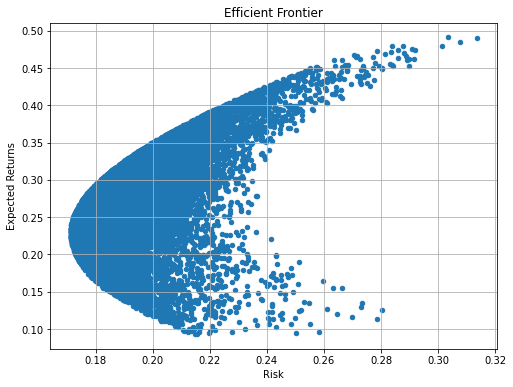

In [41]:
df.plot.scatter(x='Risk', y='Returns', figsize=(8, 6), grid=True)
plt.title('Efficient Frontier') 
plt.xlabel('Risk') 
plt.ylabel('Expected Returns') 
plt.show() 

In [42]:
# 시총 상위 4 종목으로 구현한 효율적 투자선
# x축이 해당 포트폴리오의 리스크이고 
# y축은 해당 포트폴리오의 예상 수익률이다.